### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по батчу объектов, выбранных случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [3]:
from haversine import haversine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
import os 
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
import random

In [4]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [5]:
s0_default: float = 1
p_default: float = 0.5

batch_size_default: int = 1

alpha_default: float = 0.1
eps_default: float = 1e-8

mu_default = 1e-2

tolerance_default: float = 1e-3
max_iter_default: int = 1000

In [6]:
class BaseDescent:
    """
    A base class and examples for all functions
    """

    def __init__(self):
        self.w = None

    def step(self, X: np.ndarray, y: np.ndarray, iteration: int) -> np.ndarray:
        """
        Descent step
        :param iteration: iteration number
        :param X: objects' features
        :param y: objects' targets
        :return: difference between weights
        """
        return self.update_weights(self.calc_gradient(X, y), iteration)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Example for update_weights function
        :param iteration: iteration number
        :param gradient: gradient
        :return: weight difference: np.ndarray
        """
        pass


    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Example for calc_gradient function
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        pass

In [7]:
class GradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        for i in range(iteration):
            step = self.eta(iteration) * calc_gradient(X, y)
            self.w -= step
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [8]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [9]:
gradient, diff

(array([-0.23999325, -0.24724991, -0.24151042, -0.26330689, -0.2869889 ]),
 array([0., 0., 0., 0., 0.]))

In [10]:
class StochasticDescent(BaseDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default,
                 batch_size: int = batch_size_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        :param batch_size: batch size (int)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.batch_size = batch_size
        self.loss_history = []
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        for i in range(iteration):
            random_indexes = random.sample([i for i in range(len(y))], self.batch_size)
            step = self.eta(iteraton)*self.calc_gradient(X[random_indexes], y[random_indexes]) 
            self.w -= step
            self.loss_history.append(mse(X@self.w, y))
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [11]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [12]:
gradient, diff

(array([-0.23999325, -0.24724991, -0.24151042, -0.26330689, -0.2869889 ]),
 array([0., 0., 0., 0., 0.]))

In [13]:
class MomentumDescent(BaseDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, alpha: float = alpha_default, s0: float = s0_default,
                 p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param alpha: momentum coefficient
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.alpha = alpha
        self.w = np.copy(w0)
        self.h = 0

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        for i in range(iteration):
            self.h = self.h*self.alpha + self.eta(iteraton)*self.calc_gradient(X, y)
            self.w -= self.h
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [14]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [15]:
gradient, diff

(array([-0.23999325, -0.24724991, -0.24151042, -0.26330689, -0.2869889 ]),
 array([0., 0., 0., 0., 0.]))

In [16]:
class Adagrad(BaseDescent):
    """
    Adaptive gradient algorithm class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, eps: float = eps_default, s0: float = s0_default,
                 p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param eps: smoothing term (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.eps = eps
        self.w = np.copy(w0)
        self.g = 0

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        self.g = np.zeros(np.shape(y))
        for i in range(iteration):
            random_indexes = random.sample([i for i in range(len(y))], self.batch_size)
            self.g += calc_gradient(X[random_indexes], y[random_indexes]) ** 2
            self.w -= self.eta(iteration) / ((self.g + self.eps)**0.5) * calc_gradient(X[random_indexes], y[random_indexes])
        return self.w      

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [17]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [18]:
gradient, diff

(array([-0.23999325, -0.24724991, -0.24151042, -0.26330689, -0.2869889 ]),
 array([0., 0., 0., 0., 0.]))

In [86]:
class LinearReg(BaseEstimator):
    def __init__(self,
                 gd_type='stochastic', 
                 tolerance=tolerance_default,
                 max_iter=max_iter_default,
                 w0=None,
                 eta=1e-2,
                 batch_size: int = batch_size_default):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w = w0 
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.batch_size = batch_size
        self.real_iter = 0

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        X = sm.add_constant(X)
        
        if self.w==None:
            self.w=np.zeros(np.size(X,1))

        self.loss_history = []

        if self.gd_type == 'full':
            
            for i in range(self.max_iter):
                self.real_iter += 1
                step=self.eta*self.calc_gradient(X,y) 
                w1=self.w.copy()
                self.w -= step
                self.loss_history.append(self.calc_loss(X, y))
                if np.linalg.norm(w1-self.w) < self.tolerance: 
                    break
        
        else:
            
            for i in range(self.max_iter):
                self.real_iter += 1
                random_indexes = random.sample([i for i in range(len(y))], self.batch_size)
                step=self.eta*self.calc_gradient(X[random_indexes], y[random_indexes])  
                w1=self.w.copy()
                self.w = self.w-step
                self.loss_history.append(self.calc_loss(X, y))
                if np.linalg.norm(w1-self.w) < self.tolerance:
                    break

        return self
    
    def predict(self, X):
        X = sm.add_constant(X)
        if self.w is None:
            raise Exception('Not trained yet')
        
        return X.dot(self.w)
    
    def calc_gradient(self, X, y):
        """
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        return X.T.dot(X.dot(self.w)-y)/np.size(y)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float 
        """
        return mse(X@self.w, y)

In [43]:
import seaborn as sns

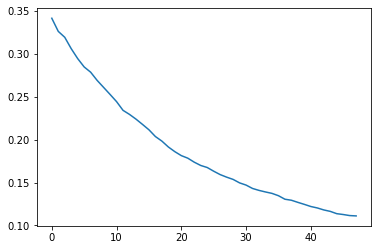

In [45]:
sg=LinearReg(eta=0.01, batch_size=10, tolerance=0.001).fit(X, y)
sg

sns.lineplot(x=np.arange(sg.real_iter), y=sg.loss_history);

## Задание 4. Работа с данными (1 балл)

In [93]:
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('ex1data2.txt', header=None, names=['X', 'y'])

In [95]:
X = df['X'].values
y = df['y'].values

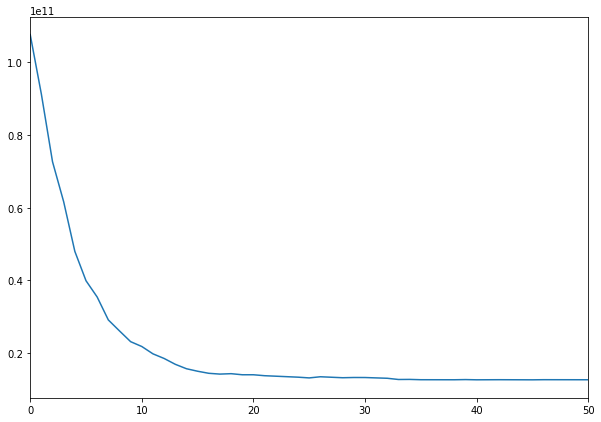

In [100]:
gd = LinearReg(batch_size=10).fit(X, y)

f, ax = plt.subplots(figsize=(10, 7))
ax = sns.lineplot(x=np.arange(gd.real_iter), y=gd.loss_history)
plt.xlim([0, 50]);

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [48]:
columns = ['eta', 'test_mse', 'test_r2', 'train_mse', 'train_r2']
full_df = pd.DataFrame(columns=columns)
sg_df = pd.DataFrame(columns=columns)


for i in np.logspace(-2, 0, 7):
    print(i)
    #full gd
    gd_full=LinearReg(gd_type='full', eta=i).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())

    y_train_pred = gd_full.predict(X_train_scaled)
    y_pred = gd_full.predict(X_test_scaled)
    
    test_mse = mse(X_test['log_trip_duration'], y_pred)
    test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
    train_mse = mse(X_train['log_trip_duration'], y_train_pred)
    train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)
    
    temp_test_df = pd.DataFrame({'eta':[0.1*(10**(-i))],
                            'test_mse': [test_mse],
                       'test_r2': [-test_r2],
                       'train_mse': [train_mse],
                       'train_r2': [-train_r2]})
    
    full_df = pd.concat([full_df, temp_test_df], ignore_index=True)
    
    sg_full=LinearReg(eta=i, batch_size=10).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())
    
    y_train_pred = sg_full.predict(X_train_scaled)
    y_pred = sg_full.predict(X_test_scaled)
    
    test_mse = mse(X_test['log_trip_duration'], y_pred)
    test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
    train_mse = mse(X_train['log_trip_duration'], y_train_pred)
    train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)
    
    temp_test_df = pd.DataFrame({'eta':[0.1*(10**(-i))],
                            'test_mse': [test_mse],
                       'test_r2': [-test_r2],
                       'train_mse': [train_mse],
                       'train_r2': [-train_r2]})
    
    sg_df = pd.concat([sg_df, temp_test_df], ignore_index=True)
    
    
full_df

0.01
0.021544346900318832
0.046415888336127774
0.1
0.21544346900318834
0.46415888336127775
1.0


/home/vyacheslav/.local/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/vyacheslav/.local/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/vyacheslav/.local/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/vyacheslav/.local/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/.local/lib/python3.8/site-pa

/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home

/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home

/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/vyacheslav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home

,eta,test_mse,test_r2,train_mse,train_r2
0,0.097724,0.561980,-0.116169,0.549452,-0.121416
1,0.095160,0.555604,-0.126197,0.541751,-0.133730
2,0.089864,0.554609,-0.127762,0.540157,-0.136278
3,0.079433,0.554550,-0.127855,0.539829,-0.136802
4,0.060891,0.554612,-0.127756,0.539757,-0.136918
5,0.034343,0.554653,-0.127693,0.539747,-0.136934
6,0.010000,0.554659,-0.127682,0.539739,-0.136946


In [49]:
sg_df

,eta,test_mse,test_r2,train_mse,train_r2
0,0.097724,5.629177e-01,-1.146941e-01,5.470020e-01,-1.253326e-01
1,0.095160,5.662446e-01,-1.094618e-01,5.489077e-01,-1.222854e-01
2,0.089864,6.179563e-01,-2.813428e-02,6.108605e-01,-2.322165e-02
3,0.079433,6.060166e-01,-4.691195e-02,5.894397e-01,-5.747387e-02
4,0.060891,5.514247e+52,8.672308e+52,5.519209e+52,8.825328e+52
5,0.034343,9.689739e+139,1.523914e+140,9.661545e+139,1.544901e+140
6,0.010000,inf,inf,inf,inf


## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [50]:
batch_sizes = np.arange(5, 500, 50)

columns = ['batch_size', 'iter_count', 'test_mse', 'test_r2', 'train_mse', 'train_r2']
sg_df = pd.DataFrame(columns=columns)


for batch_size in batch_sizes:
    print(batch_size)
    for i in range(5):

        sg_full=LinearReg(eta=1e-3, batch_size=batch_size).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())

        y_train_pred = sg_full.predict(X_train_scaled)
        y_pred = sg_full.predict(X_test_scaled)

        test_mse = mse(X_test['log_trip_duration'], y_pred)
        test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
        train_mse = mse(X_train['log_trip_duration'], y_train_pred)
        train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)

        temp_test_df = pd.DataFrame({'batch_size':[batch_size],
                                     'iter_count': [sg_full.real_iter],
                                     'test_mse': [test_mse],
                                     'test_r2': [-test_r2],
                                     'train_mse': [train_mse],
                                     'train_r2': [-train_r2]})

        sg_df = pd.concat([sg_df, temp_test_df], ignore_index=True)
    
    
sg_df

5
55
105
155
205
255
305
355
405
455


,batch_size,iter_count,test_mse,test_r2,train_mse,train_r2
0,5,1000,6.233628,8.803686,6.280063,9.041949
1,5,1000,6.243574,8.819328,6.290489,9.058620
2,5,1000,6.182281,8.722931,6.227421,8.957772
3,5,1000,6.213900,8.772660,6.258256,9.007079
4,5,1000,6.215190,8.774687,6.258334,9.007204
5,55,1000,6.154519,8.679270,6.198566,8.911633
6,55,1000,6.168464,8.701202,6.213537,8.935571
7,55,1000,6.182762,8.723688,6.227631,8.958109
8,55,1000,6.172679,8.707830,6.217454,8.941835
9,55,1000,6.165887,8.697149,6.211033,8.931568
